In [98]:
import pandas as pd
import seaborn as sb
from datetime import datetime

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

# dataset

In [11]:
filename = '~/Downloads/fila-pública-2017-11-30.csv'
df = pd.read_csv(filename)

In [12]:
df.shape

(1306967, 17)

In [13]:
df.describe()

,POSIÇÃO,TEMPO MÉDIO DE ESPERA(DIAS),NASCIMENTO,CNES DA UNIDADE SOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO
count,1.306967e+06,1.288724e+06,0.0,1.306967e+06,1.305728e+06
mean,2.502004e+03,1.942741e+02,NaN,3.539747e+06,2.414849e+08
std,3.291319e+03,3.145126e+02,NaN,1.972460e+06,5.118480e+07
min,1.000000e+00,0.000000e+00,NaN,1.925900e+04,2.040601e+07
25%,2.490000e+02,3.100000e+01,NaN,2.418916e+06,2.020602e+08
50%,1.011000e+03,9.900000e+01,NaN,2.660792e+06,2.060101e+08
75%,3.351000e+03,1.590000e+02,NaN,5.465893e+06,3.010101e+08
max,1.874000e+04,2.019000e+03,NaN,9.362223e+06,7.010701e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306967 entries, 0 to 1306966
Data columns (total 17 columns):
SERVIÇO                               1306967 non-null object
CENTRAL DE REGULAÇÃO/RESPONSÁVEL      1306967 non-null object
MUNICÍPIO DE RESIDÊNCIA               1306967 non-null object
POSIÇÃO                               1306967 non-null int64
TEMPO MÉDIO DE ESPERA(DIAS)           1288724 non-null float64
CLASSIFICAÇÃO                         1306967 non-null object
TIPO DA LISTA                         1306967 non-null object
DOCUMENTO                             1306967 non-null object
DATA DA SOLICITAÇÃO                   1306273 non-null object
CIDADÃO                               1306967 non-null object
NASCIMENTO                            0 non-null float64
DESCRIÇÃO DO PROCEDIMENTO             1306967 non-null object
CNES DA CENTRAL SOLICITANTE           1306967 non-null object
CNES DA CENTRAL EXECUTANTE            1306966 non-null object
CNES DA UNIDADE SOLICITA

In [99]:
df.rename(columns={'MUNICÍPIO DE RESIDÊNCIA': 'MUNICÍPIODERESIDÊNCIA',
                   'CENTRAL DE REGULAÇÃO/RESPONSÁVEL': 'CENTRALDEREGULAÇÃO/RESPONSÁVEL',
                   'TEMPO MÉDIO DE ESPERA(DIAS)': 'TEMPOMÉDIODEESPERA(DIAS)',
                   'DATA DA SOLICITAÇÃO': 'DATADASOLICITAÇÃO',
                   'DESCRIÇÃO DO PROCEDIMENTO': 'DESCRIÇÃODOPROCEDIMENTO',
                   'CNES DA CENTRAL EXECUTANTE': 'CNESDACENTRALEXECUTANTE',
                   'CNES DA UNIDADE SOLICITANTE': 'CNESDAUNIDADESOLICITANTE'
                  }, inplace=True)

In [100]:
df.sample(20)

,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DOCUMENTO,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,DESCRIÇÃODOPROCEDIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
679438,Consulta,CENTRO DE SAUDE FORQUILHINHAS,SAO JOSE,339,0.0,4 - Azul,Fila única,130194772620009,31/07/2014 16:10:52,A R P,NaN,CONSULTA EM ACUPUNTURA,5908418,5908418,2663813,301010072.0,NaN
602496,Exame,CENTRO DE SAUDE DA FAMILIA SANTA MARIA,CHAPECO,1409,62.0,4 - Azul,Regulada,702505391786432,09/10/2017 15:15:42,D G,NaN,ESOFAGOGASTRODUODENOSCOPIA,7974671,7974671,2537540,209010037.0,NaN
622078,Consulta,UNIDADE BASICA DE SAUDE SANTA AUGUSTA,CRICIUMA,943,49.0,4 - Azul,Fila única,709804022311496,11/09/2017 09:21:36,M S B R,NaN,CONSULTA EM OFTALMOLOGIA - GERAL,7937547,7937547,4058712,301010072.0,NaN
742901,Consulta,CENTRO DE SAUDE MORAR BEM,SAO JOSE,201,0.0,4 - Azul,Regulada,708207154298241,22/09/2014 10:02:05,J S,NaN,CONSULTA EM REUMATOLOGIA - GERAL,5908418,5908418,3069621,301010072.0,NaN
38662,Exame,UNIDADE SANITARIA DE SAO BONIFACIO,SAO BONIFACIO,846,122.0,4 - Azul,Regulada,706203062962366,25/07/2017 13:26:41,A N T,NaN,ULTRA-SONOGRAFIA DOPPLER VENOSO - MID,2622734,7606907,2622734,205010040.0,GRUPO - ULTRA-SONOGRAFIA DOPPLER
743891,Consulta,CENTRO DE SAUDE AREIAS,SAO JOSE,168,998.0,2 - Amarelo,Regulada,898003409598504,16/07/2015 07:45:43,D M,NaN,CONSULTA EM FONOAUDIOLOGIA - INFANTIL,5908418,5908418,2663783,301010048.0,NaN
378059,Consulta,PACS CENTRO,TUBARAO,130,13.0,3 - Verde,Regulada,700301985333238,11/10/2017 15:01:50,A F D S,NaN,CONSULTA EM CIRURGIA GERAL - ADULTO,421870,6420443,2491508,301010072.0,NaN
340887,Consulta,CENTRO DE SAUDE PASSA VINTE CAIC,PALHOCA,43,44.0,2 - Amarelo,Regulada,705402445111392,21/08/2017 10:13:25,L E A R,NaN,CONSULTA EM NEFROLOGIA - GERAL,421190,6082351,2624702,301010072.0,NaN
1178615,Exame,CENTRO DE SAUDE PASSA VINTE CAIC,PALHOCA,3953,133.0,4 - Azul,Fila única,700206941969329,14/08/2017 10:26:13,C D S,NaN,COLESTEROL ( LDL),6082351,6939392,2624702,202010287.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
420243,Exame,CENTRO DE SAUDE MEDIO ARIRIU,PALHOCA,497,106.0,2 - Amarelo,Regulada,709609677633778,13/11/2017 14:41:31,O I S,NaN,GLICEMIA DE JEJUM,6082351,6082351,2665093,202010473.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)


# serviços solicitados por municípios

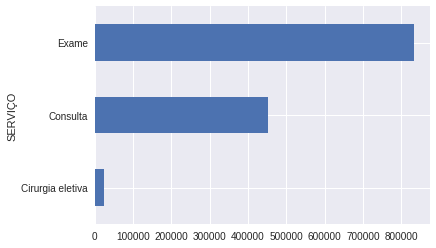

In [23]:
df.groupby('SERVIÇO').size().sort_values().plot(kind='barh')

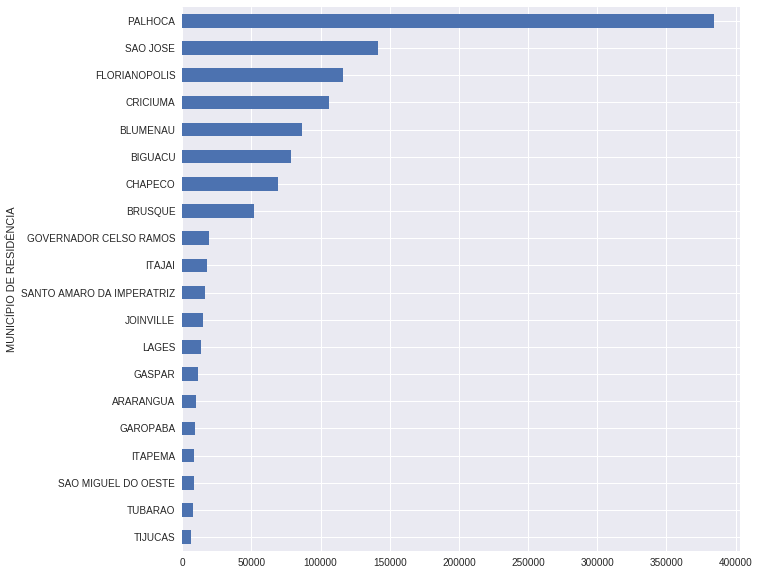

In [28]:
df.groupby('MUNICÍPIODERESIDÊNCIA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

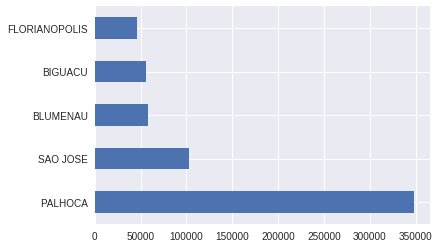

In [39]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

In [32]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts()

PALHOCA                      347913
SAO JOSE                     102497
BLUMENAU                      57577
BIGUACU                       55737
FLORIANOPOLIS                 45871
BRUSQUE                       42011
CHAPECO                       30321
CRICIUMA                      26435
GOVERNADOR CELSO RAMOS        14941
JOINVILLE                     11112
SANTO AMARO DA IMPERATRIZ     11091
GASPAR                         8683
LAGES                          6154
GAROPABA                       5503
ARARANGUA                      4869
TUBARAO                        3716
NOVA TRENTO                    3484
TIJUCAS                        2958
ITAPEMA                        2946
SAO MIGUEL DO OESTE            2564
ITAJAI                         2522
PAULO LOPES                    2313
LAGUNA                         1622
SANTA ROSA DO SUL              1515
CAMBORIU                       1392
SOMBRIO                        1337
AGUAS MORNAS                   1322
FRAIBURGO                   

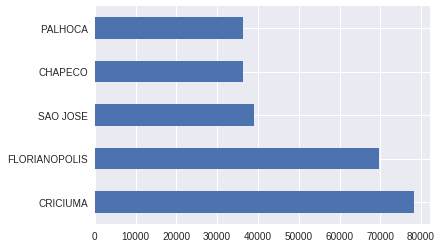

In [232]:
df.query('SERVIÇO == "Consulta"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

In [33]:
df.query('SERVIÇO == "Consulta"')['MUNICÍPIODERESIDÊNCIA'].value_counts()

CRICIUMA                            78185
FLORIANOPOLIS                       69684
SAO JOSE                            39062
CHAPECO                             36428
PALHOCA                             36313
BLUMENAU                            26156
BIGUACU                             22435
ITAJAI                              13739
BRUSQUE                              8583
LAGES                                6413
SAO MIGUEL DO OESTE                  5587
ITAPEMA                              5566
SANTO AMARO DA IMPERATRIZ            5191
ARARANGUA                            5012
GOVERNADOR CELSO RAMOS               4534
ARAQUARI                             4301
CONCORDIA                            3677
TIJUCAS                              3550
TUBARAO                              3400
SAO JOAO BATISTA                     3361
GAROPABA                             3340
JOINVILLE                            3312
RIO DO SUL                           2679
GASPAR                            

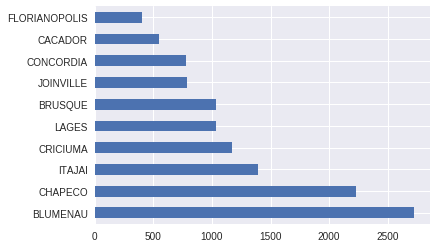

In [234]:
df.query('SERVIÇO == "Cirurgia eletiva"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head(10).plot(kind='barh')

# média de exames por paciente por município

In [197]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().describe()

count    31797.000000
mean        10.941693
std         12.505739
min          1.000000
25%          2.000000
50%          4.000000
75%         18.000000
max         90.000000
Name: DOCUMENTO, dtype: float64

In [193]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SAO JOSE"').DOCUMENTO.value_counts().describe()

count    54560.000000
mean         1.878611
std          1.901741
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         35.000000
Name: DOCUMENTO, dtype: float64

In [194]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"').DOCUMENTO.value_counts().describe()

count    20505.000000
mean         2.807949
std          2.959257
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         35.000000
Name: DOCUMENTO, dtype: float64

In [195]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"').DOCUMENTO.value_counts().describe()

count    18393.000000
mean         3.030338
std          3.800691
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         37.000000
Name: DOCUMENTO, dtype: float64

In [196]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"').DOCUMENTO.value_counts().describe()

count    28094.000000
mean         1.632769
std          1.789597
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: DOCUMENTO, dtype: float64

# pacientes com muitos exames

In [101]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts()

704207709501384    90
700603418445267    80
700000291920300    80
700505394201153    78
702005327186289    77
707507227682290    75
700000481327406    73
705009265166954    72
702505393010938    72
704300595817291    71
700401459979541    71
700000538700909    70
708402202548668    70
708507058823680    70
706209092555063    70
705403451142599    68
702006343392182    68
200976607490004    68
701207073562413    68
701806282573675    66
705003225150857    66
706407182354586    66
705101347228440    66
702008818070283    66
702402575390327    65
706401140710281    65
700500912402652    64
700901980874391    64
704509193879620    64
705405426035492    64
703302250141610    64
705801472189637    63
703404196749300    62
703407256150917    62
700507741946250    62
700307992471131    62
707809625565412    62
700008865448800    62
702602727434540    61
700005409773602    61
705400481707397    61
700501149446552    61
704600176947126    60
705009259912852    60
706204504632065    60
          

In [224]:
df.query('DOCUMENTO == 704207709501384')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO')

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
264552,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,6519,6082351,7124619
1189115,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,4990,6939392,7124619
300253,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224544,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619
264515,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
1189078,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
1189079,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
264516,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
300254,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224545,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619


In [223]:
df.query('DOCUMENTO == 700603418445267')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO')

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
194548,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134084,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194549,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134085,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194550,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134086,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
1134105,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194569,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018
1134106,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194570,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018


# quantificando a deduplicação

In [178]:
def deduplicate(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']))
    unique_rows_same_date = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO', 'DATADASOLICITAÇÃO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registros na fila:', total_rows)
    print('    registros únicos na fila:', unique_rows)
#     print('registros agendados no mesmo timestamp:', unique_rows_same_date)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')

In [174]:
# geral
deduplicate()

registros na fila: 1306967
registros únicos na fila: 1080625
duplicados (total):  226342
duplicados (mesmo timestamp):  222124
redução com deduplicação: 17 %


In [200]:
deduplicate('SERVIÇO == "Exame"')

           registros na fila: 832611
    registros únicos na fila: 658907
          duplicados (total): 173704
duplicados (mesmo timestamp): 171493
    redução com deduplicação: 20 %


In [198]:
deduplicate('SERVIÇO == "Consulta"')

           registros na fila: 451122
    registros únicos na fila: 398828
          duplicados (total): 52294
duplicados (mesmo timestamp): 50405
    redução com deduplicação: 11 %


In [199]:
deduplicate('SERVIÇO == "Cirurgia eletiva"')

           registros na fila: 23234
    registros únicos na fila: 22890
          duplicados (total): 344
duplicados (mesmo timestamp): 226
    redução com deduplicação: 1 %


### deduplicação por município

In [179]:
deduplicate('MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 384253
    registros únicos na fila: 223579
          duplicados (total): 160674
duplicados (mesmo timestamp): 160305
    redução com deduplicação: 41 %


In [180]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 347913
    registros únicos na fila: 199099
          duplicados (total): 148814
duplicados (mesmo timestamp): 148594
    redução com deduplicação: 42 %


In [181]:
deduplicate('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 36313
    registros únicos na fila: 24453
          duplicados (total): 11860
duplicados (mesmo timestamp): 11711
    redução com deduplicação: 32 %


In [182]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SAO JOSE"')

           registros na fila: 102497
    registros únicos na fila: 101021
          duplicados (total): 1476
duplicados (mesmo timestamp): 576
    redução com deduplicação: 1 %


In [183]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"')

           registros na fila: 57577
    registros únicos na fila: 57535
          duplicados (total): 42
duplicados (mesmo timestamp): 24
    redução com deduplicação: 0 %


In [184]:
deduplicate('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"')

           registros na fila: 26156
    registros únicos na fila: 26139
          duplicados (total): 17
duplicados (mesmo timestamp): 3
    redução com deduplicação: 0 %


In [185]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"')

           registros na fila: 55737
    registros únicos na fila: 45188
          duplicados (total): 10549
duplicados (mesmo timestamp): 10037
    redução com deduplicação: 18 %


In [186]:
deduplicate('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"')

           registros na fila: 22435
    registros únicos na fila: 14648
          duplicados (total): 7787
duplicados (mesmo timestamp): 7705
    redução com deduplicação: 34 %


In [187]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"')

           registros na fila: 45871
    registros únicos na fila: 45754
          duplicados (total): 117
duplicados (mesmo timestamp): 3
    redução com deduplicação: 0 %


In [188]:
deduplicate('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"')

           registros na fila: 69684
    registros únicos na fila: 67698
          duplicados (total): 1986
duplicados (mesmo timestamp): 1633
    redução com deduplicação: 2 %


In [189]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"')

           registros na fila: 55737
    registros únicos na fila: 45188
          duplicados (total): 10549
duplicados (mesmo timestamp): 10037
    redução com deduplicação: 18 %


In [225]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BRUSQUE"')

           registros na fila: 42011
    registros únicos na fila: 41479
          duplicados (total): 532
duplicados (mesmo timestamp): 440
    redução com deduplicação: 1 %


In [226]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "CHAPECO"')

           registros na fila: 30321
    registros únicos na fila: 30313
          duplicados (total): 8
duplicados (mesmo timestamp): 1
    redução com deduplicação: 0 %


In [227]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "CRICIUMA"')

           registros na fila: 26435
    registros únicos na fila: 22584
          duplicados (total): 3851
duplicados (mesmo timestamp): 3826
    redução com deduplicação: 14 %


In [228]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "GOVERNADOR CELSO RAMOS"')

           registros na fila: 14941
    registros únicos na fila: 14413
          duplicados (total): 528
duplicados (mesmo timestamp): 422
    redução com deduplicação: 3 %


In [229]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "JOINVILLE"')

           registros na fila: 11112
    registros únicos na fila: 11111
          duplicados (total): 1
duplicados (mesmo timestamp): 0
    redução com deduplicação: 0 %


In [230]:
deduplicate('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SANTO AMARO DA IMPERATRIZ"')

           registros na fila: 11091
    registros únicos na fila: 10667
          duplicados (total): 424
duplicados (mesmo timestamp): 381
    redução com deduplicação: 3 %


### casos de duplicação com timestamps diferentes

In [190]:
df.query('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"').groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']).count().query('SERVIÇO > 1')  

,,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
DOCUMENTO,DESCRIÇÃODOPROCEDIMENTO,,,,,,,,,,,,,,,
102565283890005,CONSULTA EM ORTOPEDIA - JOELHO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
106406250770005,CONSULTA EM ORTOPEDIA (OMBROS),4,4,4,4,4,4,4,4,4,0,4,4,4,4,0
106494974700008,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
107850981400007,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
107972018630003,CONSULTA EM CIRURGIA GERAL - ADULTO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
108641967650000,CONSULTA EM CIRURGIA GERAL - ADULTO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120268161090008,CONSULTA EM ORTOPEDIA - JOELHO,3,3,3,3,3,3,3,3,3,0,3,3,3,3,0
120522676990000,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120788847680004,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0


In [170]:
df.query('DOCUMENTO == 106406250770005')[['SERVIÇO', 'POSIÇÃO', 'DATADASOLICITAÇÃO', 'DESCRIÇÃODOPROCEDIMENTO', 'CNESDACENTRALEXECUTANTE']]

,SERVIÇO,POSIÇÃO,DATADASOLICITAÇÃO,DESCRIÇÃODOPROCEDIMENTO,CNESDACENTRALEXECUTANTE
818446,Consulta,314,24/07/2012 09:32:26,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818622,Consulta,490,19/11/2012 09:48:33,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818878,Consulta,746,21/06/2013 16:07:22,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818943,Consulta,811,26/07/2013 17:31:28,CONSULTA EM ORTOPEDIA (OMBROS),2692260


### pacientes / habitante (por município)

In [217]:
def perc_pacientes(municipio, populacao):
    pacientes = len(set(df.query('MUNICÍPIODERESIDÊNCIA == "'+municipio+'"')['DOCUMENTO']))
    perc_pacientes = pacientes / populacao
    print(int(100*perc_pacientes), '% -', municipio)

In [218]:
perc_pacientes('PALHOCA', 119360)
perc_pacientes('FLORIANOPOLIS', 249477)
perc_pacientes('SAO JOSE', 210513)
perc_pacientes('BLUMENAU', 309214)
perc_pacientes('BIGUACU', 63440)
perc_pacientes('BRUSQUE', 102025)
perc_pacientes('CHAPECO', 166040)
perc_pacientes('CRICIUMA', 133031)
perc_pacientes('GOVERNADOR CELSO RAMOS', 13944)
perc_pacientes('JOINVILLE', 486803)
perc_pacientes('SANTO AMARO DA IMPERATRIZ', 17602)

35 % - PALHOCA
32 % - FLORIANOPOLIS
34 % - SAO JOSE
11 % - BLUMENAU
40 % - BIGUACU
13 % - BRUSQUE
26 % - CHAPECO
45 % - CRICIUMA
39 % - GOVERNADOR CELSO RAMOS
2 % - JOINVILLE
42 % - SANTO AMARO DA IMPERATRIZ


## exames mais solicitados

In [238]:
df['DESCRIÇÃODOPROCEDIMENTO'].value_counts().to_frame()

,DESCRIÇÃODOPROCEDIMENTO
CONSULTA EM OFTALMOLOGIA - GERAL,66417
CONSULTA EM OTORRINOLARINGOLOGIA - GERAL,29972
ULTRA-SONOGRAFIA TRANSVAGINAL,28250
CONSULTA EM ORTOPEDIA - GERAL,26785
HEMOGRAMA COMPLETO,26014
TRIGLICERIDEOS,21507
CREATININA,19010
GLICEMIA DE JEJUM,18521
ENDOSCOPIA DIGESTIVA ALTA,17761
CONSULTA EM DERMATOLOGIA - GERAL,17345


### cidades que mais solicitam o exame mais procurado

In [240]:
df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL"')['MUNICÍPIODERESIDÊNCIA'].value_counts().to_frame() 

,MUNICÍPIODERESIDÊNCIA
FLORIANOPOLIS,19032
CRICIUMA,13661
CHAPECO,9142
PALHOCA,7677
SAO JOSE,2633
LAGES,2004
SAO JOAO BATISTA,1597
CONCORDIA,1175
SAO MIGUEL DO OESTE,1131
ARARANGUA,1040


In [255]:
df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL"').groupby(['CÓDIGO SIGTAP DO PROCEDIMENTO', 'MUNICÍPIODERESIDÊNCIA', 'CNESDACENTRALEXECUTANTE', 'TEMPOMÉDIODEESPERA(DIAS)', 'CLASSIFICAÇÃO']).count()[['POSIÇÃO']].query('MUNICÍPIODERESIDÊNCIA == "CANELINHA"') 

POSIÇÃO
CÓDIGO SIGTAP DO PROCEDIMENTO MUNICÍPIODERESIDÊNCIA CNESDACENTRALEXECUTANTE TEMPOMÉDIODEESPERA(DIAS) CLASSIFICAÇÃO         
301010072.0                   CANELINHA             2692260                 417.0                    2 - Amarelo         12
                                                                                                     3 - Verde            7
                                                                                                     4 - Azul             6
                                                    6515681                 44.0                     1 - Vermelho         4
                                                                                                     4 - Azul            34
                                                                            45.0                     1 - Vermelho         1
                                                                                                     4 - Azul            32
                                                    6541666                 34.0                     4 - Azul             4
                                                    6939392                 395.0                    4 - Azul            16

In [269]:
datas = df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL" and MUNICÍPIODERESIDÊNCIA == "CANELINHA"').DATADASOLICITAÇÃO  
print('min', min(pd.to_datetime(datas)))
print('max', max(pd.to_datetime(datas)))

min 2014-12-12 13:47:16
max 2017-11-27 14:16:20
